# Part 2: Single Linear Neuron
## (iii)

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('heat_influx_noth_south.csv')

# Standardize the features
scaler = StandardScaler()
data[['North', 'South']] = scaler.fit_transform(data[['North', 'South']])

# Parameters
w1, w2 = np.random.randn(), np.random.randn()  # Improved random initialization
b = np.random.randn()
learning_rate = 0.01
epochs = 3000
lambda_reg = 0.01  # Regularization strength

# Training the model
for epoch in range(epochs):
    # Predicted heat influx
    y_pred = b + w1 * data['North'] + w2 * data['South']
    
    # Calculate errors
    error = data['HeatFlux'] - y_pred
    
    # Update weights and bias with L2 regularization
    w1 -= learning_rate * ((-2 * (error * data['North']).mean()) + (lambda_reg * w1))
    w2 -= learning_rate * ((-2 * (error * data['South']).mean()) + (lambda_reg * w2))
    b -= learning_rate * (-2 * error.mean())
    
    # Adjust learning rate dynamically
    learning_rate *= 0.999

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        mse = mean_squared_error(data['HeatFlux'], y_pred)
        print(f"Epoch {epoch}: MSE = {mse}")
        
# Final predictions
final_pred = b + w1 * data['North'] + w2 * data['South']

# Calculate metrics
mse = mean_squared_error(data['HeatFlux'], final_pred)
r_squared = r2_score(data['HeatFlux'], final_pred)

print(f"Final MSE: {mse}")
print(f"R² Score: {r_squared}")
print(f"Heat Influx = {b:.4f} + {w1:.4f}*North + {w2:.4f}*South")


Epoch 0: MSE = 4.136974108339421
Epoch 100: MSE = 0.06349911425903433
Epoch 200: MSE = 0.010063645710886504
Epoch 300: MSE = 0.007774952727558083
Epoch 400: MSE = 0.0075927884367934274
Epoch 500: MSE = 0.007576210482964849
Epoch 600: MSE = 0.007575603830948032
Epoch 700: MSE = 0.00757621176081081
Epoch 800: MSE = 0.007576634361960219
Epoch 900: MSE = 0.007576866275964991
Epoch 1000: MSE = 0.007576990522728447
Epoch 1100: MSE = 0.007577058628735783
Epoch 1200: MSE = 0.007577097329909046
Epoch 1300: MSE = 0.007577120191284923
Epoch 1400: MSE = 0.007577134216800008
Epoch 1500: MSE = 0.0075771431330630785
Epoch 1600: MSE = 0.007577148990564346
Epoch 1700: MSE = 0.007577152956081956
Epoch 1800: MSE = 0.007577155715282006
Epoch 1900: MSE = 0.007577157683505046
Epoch 2000: MSE = 0.007577159119553605
Epoch 2100: MSE = 0.007577160188973376
Epoch 2200: MSE = 0.007577161000258511
Epoch 2300: MSE = 0.007577161626127285
Epoch 2400: MSE = 0.007577162116341877
Epoch 2500: MSE = 0.007577162505616201
E

### 1. Extracting Model Weights and Writing the Network Function Equation

- **Bias** (b): $0.7010$
- **Weight** for North Elevation (North): $-0.2210$
- **Weight** for South Elevation (South): $0.0890$

Thus, the network function equation for the model is:
$$
\[ \text{Heat Influx} = 0.7010 - 0.2210 \times \text{North} + 0.0890 \times \text{South} \]
$$

### 2. Modifying the Programme to Find the Mean Square Error (MSE) and R² Score

- **Final MSE**: $0.007577167428771719$
- **R² Score**: $0.8586320257272538$

### 3. Comparing the Error Difference Between the Previous Single-Input Case (Part ii) and the Current Two-Input Case

#### Results from Part (ii) (Single-Input Model)
- **Final MSE**: $0.014981461514757207$
- **R² Score**: $0.7204893667857554$

#### Latest Results from Part (iii) (Two-Input Model)
- **Final MSE**: $0.007577167428771719$ — Significantly Reduced
- **R² Score**: $0.8586320257272538$ — Significantly Improved

#### Analysis
- **MSE**: The significant reduction in MSE in the two-input model indicates that the model has smaller errors in predicting heat influx, suggesting a better fit.
- **R² Score**: The improvement in R² score demonstrates that the two-input model can explain the variability in the data better and possesses higher predictive accuracy.

#### Conclusion

The results of these comparisons suggest that the model that includes Southern Elevation as a second input is not only statistically superior, but may also be able to more accurately predict Heat Influx in real-world applications, possibly due to the fact that it captures more of the factors that influence Heat Influx. Overall, the dual-input model performed better than the single-input model, validating the positive impact of adding relevant feature inputs to improve model performance.


# Part 2: Single Linear Neuron
## (iv)

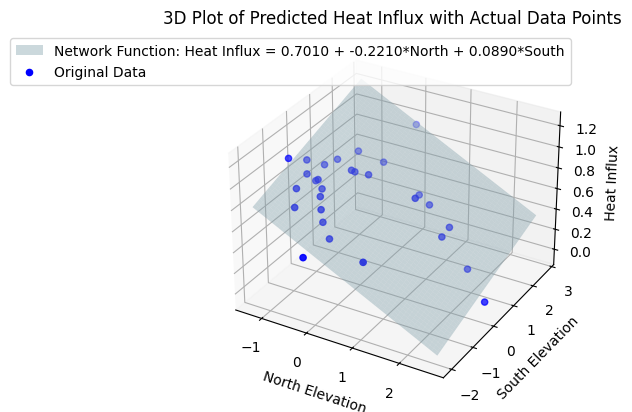

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for the inputs
north_range = np.linspace(data['North'].min(), data['North'].max(), 100)
south_range = np.linspace(data['South'].min(), data['South'].max(), 100)
north_grid, south_grid = np.meshgrid(north_range, south_range)

# Calculate predicted heat influx for the grid
predicted_heat_influx = b + w1 * north_grid + w2 * south_grid

# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a label for the equation
surf = ax.plot_surface(north_grid, south_grid, predicted_heat_influx, alpha=0.4, color='lightblue', label='Network Function: ' + f"Heat Influx = {b:.4f} + {w1:.4f}*North + {w2:.4f}*South")
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d

# Scatter plot of actual data points with deep blue color
ax.scatter(data['North'], data['South'], data['HeatFlux'], color='blue', label='Original Data')


ax.set_xlabel('North Elevation')
ax.set_ylabel('South Elevation')
ax.set_zlabel('Heat Influx')
plt.title('3D Plot of Predicted Heat Influx with Actual Data Points')
plt.legend()
plt.show()

# Part 2: Single Linear Neuron
## (v)

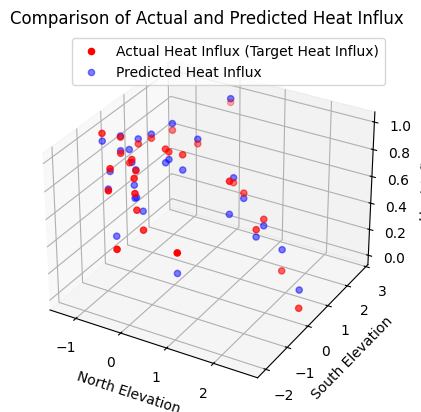

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Continuing from previously calculated final_pred for predictions

# 3D Plotting to show actual vs predicted data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(data['North'], data['South'], data['HeatFlux'], color='red', label='Actual Heat Influx (Target Heat Influx)')

# Scatter plot of predicted data points
ax.scatter(data['North'], data['South'], final_pred, color='blue', label='Predicted Heat Influx', alpha=0.5)

ax.set_xlabel('North Elevation')
ax.set_ylabel('South Elevation')
ax.set_zlabel('Heat Influx')
plt.title('Comparison of Actual and Predicted Heat Influx')
plt.legend()
plt.show()
